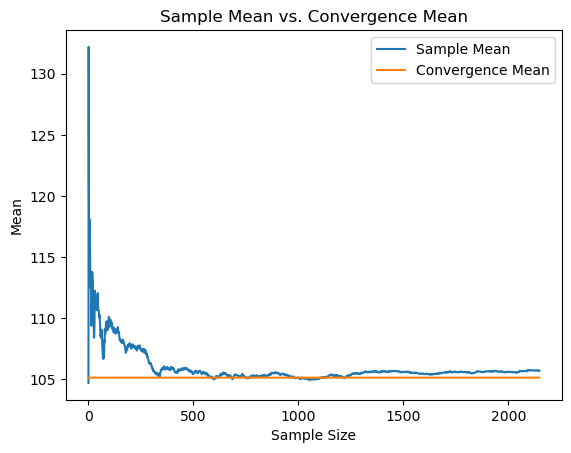

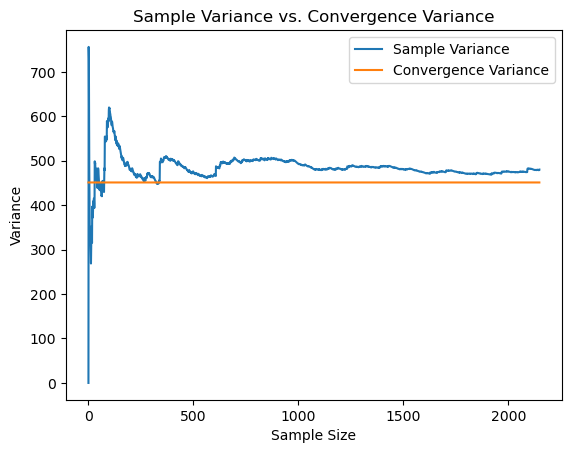

Net Income: 5000
Dividend Payout Ratio: 0.1
Dividend Yield: 0.0002
Earnings Yield: 0.05


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Stock:
    def __init__(self, expected_return, volatility, current_price, dividend_yield, earnings_per_share):
        self.expected_return = expected_return # 기대수익률
        self.volatility = volatility # 주식의 변동성
        self.current_price = current_price # 주식의 현재가격
        self.dividend_yield = dividend_yield # 배당 수익률
        self.earnings_per_share = earnings_per_share # 주당 순이익

    def future_price(self, T, seed, size=1):
        np.random.seed(seed)
        z = np.random.standard_normal(size)
        future_prices = self.current_price * np.exp(
            (self.expected_return - 0.5 * self.volatility ** 2) * T + self.volatility * np.sqrt(T) * z
        )
        return future_prices
    
    def sample_statistics(self, T, seed, n):
        np.random.seed(seed)
        future_prices = self.future_price(T, seed, size=n)
        sample_mean = np.mean(future_prices)  # 표본평균
        sample_variance = np.var(future_prices)  # 표본분산
        convergence_mean = self.current_price * np.exp(self.expected_return * T) # 수렴평균
        convergence_variance = (
            self.current_price ** 2
            * np.exp(2 * self.expected_return * T)
            * (np.exp(self.volatility ** 2 * T) - 1)
        ) # 수렴분산
        return sample_mean, sample_variance, convergence_mean, convergence_variance
    
    def calculate_net_income(self, shares): # 순이익을 구하는 멤버함수
        net_income = self.earnings_per_share * shares
        return net_income

    def calculate_dividend_payout_ratio(self, dividend, net_income): # 배당지급비율 구하는 멤버함수
        payout_ratio = dividend / net_income
        return payout_ratio
    
    def calculate_dividend_yield(self): # 배당수익률 구하는 멤버함수
        dividend_yield = self.dividend_yield / self.current_price
        return dividend_yield
    
    def calculate_earnings_yield(self): # 주가수익률 구하는 멤버함수
        earnings_yield = self.earnings_per_share / self.current_price
        return earnings_yield

# Stock 클래스에 대한 각 인수의 정보
stock = Stock(0.05, 0.2, 100, 0.02, 5)

# 시뮬레이션에 사용될 T, 시드, 시뮬레이션 횟수
T = 1
seed = 18
n = 2147

# 표본 평균, 수렴 평균, 표본 분산, 수렴 분산을 저장하기 위한 리스트를 초기화하고, 시뮬레이션 횟수에 해당하는 'sample_sizes 저장'
sample_means = []
convergence_means = []

sample_variances = []
convergence_variances = []

sample_sizes = range(1, n + 1)

for size in sample_sizes: # 주어진 시뮬레이션 횟수에 대해 'sample_statistics'함수를 호출하고 각각의 수치를 계산하고, 리스트에 저장
    sample_mean, sample_variance, convergence_mean, convergence_variance = stock.sample_statistics(T, seed, size)
    sample_means.append(sample_mean)
    convergence_means.append(convergence_mean)
    sample_variances.append(sample_variance)
    convergence_variances.append(convergence_variance)

# 표본 평균과 수렴 평균에 대한 꺾은선그래프 그리기
plt.plot(sample_sizes, sample_means, label='Sample Mean')
plt.plot(sample_sizes, convergence_means, label='Convergence Mean')
plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.title('Sample Mean vs. Convergence Mean')
plt.legend()
plt.show()

# 표본 분산과 수렴 분산에 대한 꺾은선그래프 그리기
plt.plot(sample_sizes, sample_variances, label='Sample Variance')
plt.plot(sample_sizes, convergence_variances, label='Convergence Variance')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Sample Variance vs. Convergence Variance')
plt.legend()
plt.show()

# 순이익 계산하기
shares = 1000
net_income = stock.calculate_net_income(shares)
print("Net Income:", net_income)

# 배당지급비율 계산하기
dividend = 500
payout_ratio = stock.calculate_dividend_payout_ratio(dividend, net_income)
print("Dividend Payout Ratio:", payout_ratio)

# 배당수익률 계산하기
dividend_yield = stock.calculate_dividend_yield()
print("Dividend Yield:", dividend_yield)

# 주가수익률 계산하기
earnings_yield = stock.calculate_earnings_yield()
print("Earnings Yield:", earnings_yield)